In [10]:
import numpy as np
import matplotlib.pyplot as plt

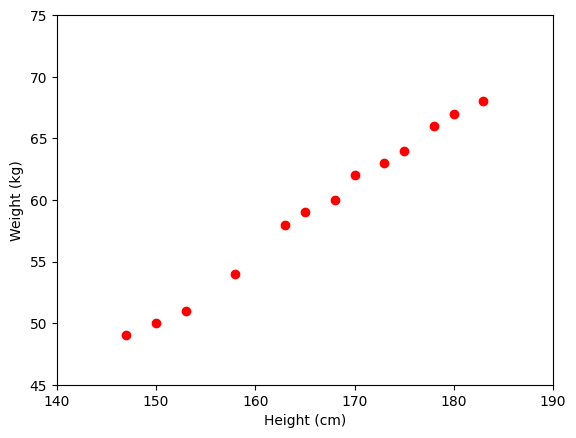

In [11]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## Nghiệm theo công thức

w =  [[-33.73541021]
 [  0.55920496]]


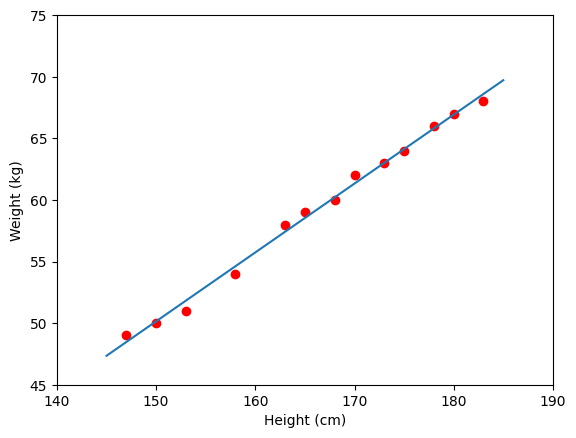

In [ ]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# truong hop A khong kha nghich, su dung gia nghich dao 
# tinh toan w = (X'X)^-1 X'y = (A+)b 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# plot the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line 
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [16]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( f'Predict weight of person with height 155 cm: {y1:.3f}(kg), real number: 52 (kg)' )
print( f'Predict weight of person with height 160 cm: {y2:.3f}(kg), real number: 56 (kg)' )

Predict weight of person with height 155 cm: 52.941(kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.737(kg), real number: 56 (kg)


## Nghiệm theo scikit-learn

In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# fit the model by Linear Regression
model = linear_model.LinearRegression(fit_intercept=False) # for calculating bias w0
model.fit(Xbar, y)

# compare the result
print(f'By formula: w0 = {w_0:.3f}, w1 = {w_1:.3f}')
print(f'By sklearn: w0 = {model.coef_[0][0]:.3f}, w1 = {model.coef_[0][1]:.3f}')

By formula: w0 = -33.735, w1 = 0.559
By sklearn: w0 = -33.735, w1 = 0.559


In [25]:
y_pred = model.predict(Xbar)

# R^2 score
print("R^2:", r2_score(y, y_pred))

# Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y, y_pred))

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y, y_pred))


R^2: 0.9944856921763271
MSE: 0.21835353820129721
RMSE: 0.46728314564222967
MAE: 0.38921298605538696
